Data Preparation

In [8]:
import os
import sys
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mlflow.sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
sys.path.append(os.path.abspath('../scripts'))
sys.path.append(os.path.abspath('..src'))

load the datas

In [9]:
encoded_data = pd.read_csv(r'C:\Users\befekadum\Documents\10x acadamy\week8and9\fraud_detection_system\data\encoded_data.csv')
credit_card_data = pd.read_csv(r'C:\Users\befekadum\Documents\10x acadamy\week8and9\fraud_detection_system\data\creditcard.csv')

Feature and Target Separation: The target column is:

'Class' for the credit card dataset.
'class' for the fraud_data dataset.

In [10]:
encoded_data

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,transaction_frequency,transaction_velocity,browser_encoded,source_encoded,device_id_encoded,sex_encoded,country_encoded
0,2,2015-01-11 03:47:13,2015-02-21 10:03:37,0.931338,FGBQNDNBETFJJ,SEO,Chrome,F,25,880217484,0,United States,1,-1.0,0,2,27684,0,171
1,4,2015-06-02 16:40:57,2015-09-26 21:32:16,0.221836,MKFUIVOHLJBYN,Direct,Safari,F,38,2785906106,0,Switzerland,1,-1.0,4,1,65372,0,157
2,8,2015-05-28 07:53:06,2015-08-13 11:53:07,0.549298,SCQGQALXBUQZJ,SEO,Chrome,M,25,356056736,0,United States,1,-1.0,0,2,96071,1,171
3,9,2015-05-16 15:58:32,2015-05-20 23:06:42,1.367955,IEZOHXPZBIRTE,SEO,FireFox,M,21,759104706,0,Unknown,1,-1.0,1,2,43174,1,172
4,12,2015-01-10 06:25:12,2015-03-04 20:56:37,-0.105627,MSNWCFEHKTIOY,Ads,Safari,M,19,2985180352,0,Mexico,1,-1.0,4,0,67065,1,107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,399992,2015-06-04 17:43:28,2015-09-30 07:19:17,2.459497,CNVFEDSCAWXGS,Direct,Safari,M,59,1549469282,0,France,1,-1.0,4,1,13470,1,60
151108,399993,2015-07-30 03:41:08,2015-10-01 07:16:25,-0.924284,XJMTBAKOHKTGR,Direct,IE,F,37,2755338335,0,Germany,1,-1.0,2,1,124084,0,64
151109,399995,2015-03-10 05:19:31,2015-06-05 23:36:56,-0.214781,RYXNXTOXIYRQG,Direct,FireFox,F,35,3701447303,0,Japan,1,-1.0,1,1,95293,0,84
151110,399997,2015-06-30 09:02:16,2015-10-07 20:56:54,1.586263,XFNGDCCMMBTCB,Direct,Chrome,M,48,3454704355,0,United States,1,-1.0,0,1,123264,1,171


In [11]:
encoded_data['purchase_time']= pd.to_datetime(encoded_data['purchase_time'])
encoded_data['signup_time']= pd.to_datetime(encoded_data['signup_time'])
# Extracting features from the signup_time and purchase_time
encoded_data['signup_year'] = encoded_data['signup_time'].dt.year
encoded_data['signup_month'] = encoded_data['signup_time'].dt.month
encoded_data['signup_day'] = encoded_data['signup_time'].dt.day
encoded_data['signup_hour'] = encoded_data['signup_time'].dt.hour

encoded_data['purchase_year'] = encoded_data['purchase_time'].dt.year
encoded_data['purchase_month'] = encoded_data['purchase_time'].dt.month
encoded_data['purchase_day'] = encoded_data['purchase_time'].dt.day
encoded_data['purchase_hour'] = encoded_data['purchase_time'].dt.hour

# Drop the original datetime columns
encoded_data.drop(['signup_time', 'purchase_time'], axis=1, inplace=True)


In [12]:
encoded_data.dtypes

user_id                    int64
purchase_value           float64
device_id                 object
source                    object
browser                   object
sex                       object
age                        int64
ip_address                 int64
class                      int64
country                   object
transaction_frequency      int64
transaction_velocity     float64
browser_encoded            int64
source_encoded             int64
device_id_encoded          int64
sex_encoded                int64
country_encoded            int64
signup_year                int32
signup_month               int32
signup_day                 int32
signup_hour                int32
purchase_year              int32
purchase_month             int32
purchase_day               int32
purchase_hour              int32
dtype: object

In [13]:
encoded_data

,user_id,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,...,sex_encoded,country_encoded,signup_year,signup_month,signup_day,signup_hour,purchase_year,purchase_month,purchase_day,purchase_hour
0,2,0.931338,FGBQNDNBETFJJ,SEO,Chrome,F,25,880217484,0,United States,...,0,171,2015,1,11,3,2015,2,21,10
1,4,0.221836,MKFUIVOHLJBYN,Direct,Safari,F,38,2785906106,0,Switzerland,...,0,157,2015,6,2,16,2015,9,26,21
2,8,0.549298,SCQGQALXBUQZJ,SEO,Chrome,M,25,356056736,0,United States,...,1,171,2015,5,28,7,2015,8,13,11
3,9,1.367955,IEZOHXPZBIRTE,SEO,FireFox,M,21,759104706,0,Unknown,...,1,172,2015,5,16,15,2015,5,20,23
4,12,-0.105627,MSNWCFEHKTIOY,Ads,Safari,M,19,2985180352,0,Mexico,...,1,107,2015,1,10,6,2015,3,4,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,399992,2.459497,CNVFEDSCAWXGS,Direct,Safari,M,59,1549469282,0,France,...,1,60,2015,6,4,17,2015,9,30,7
151108,399993,-0.924284,XJMTBAKOHKTGR,Direct,IE,F,37,2755338335,0,Germany,...,0,64,2015,7,30,3,2015,10,1,7
151109,399995,-0.214781,RYXNXTOXIYRQG,Direct,FireFox,F,35,3701447303,0,Japan,...,0,84,2015,3,10,5,2015,6,5,23
151110,399997,1.586263,XFNGDCCMMBTCB,Direct,Chrome,M,48,3454704355,0,United States,...,1,171,2015,6,30,9,2015,10,7,20


In [14]:
encoded_data.drop(['device_id','source','browser','sex','country'],axis=1,inplace=True)

In [15]:
encoded_data

,user_id,purchase_value,age,ip_address,class,transaction_frequency,transaction_velocity,browser_encoded,source_encoded,device_id_encoded,sex_encoded,country_encoded,signup_year,signup_month,signup_day,signup_hour,purchase_year,purchase_month,purchase_day,purchase_hour
0,2,0.931338,25,880217484,0,1,-1.0,0,2,27684,0,171,2015,1,11,3,2015,2,21,10
1,4,0.221836,38,2785906106,0,1,-1.0,4,1,65372,0,157,2015,6,2,16,2015,9,26,21
2,8,0.549298,25,356056736,0,1,-1.0,0,2,96071,1,171,2015,5,28,7,2015,8,13,11
3,9,1.367955,21,759104706,0,1,-1.0,1,2,43174,1,172,2015,5,16,15,2015,5,20,23
4,12,-0.105627,19,2985180352,0,1,-1.0,4,0,67065,1,107,2015,1,10,6,2015,3,4,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,399992,2.459497,59,1549469282,0,1,-1.0,4,1,13470,1,60,2015,6,4,17,2015,9,30,7
151108,399993,-0.924284,37,2755338335,0,1,-1.0,2,1,124084,0,64,2015,7,30,3,2015,10,1,7
151109,399995,-0.214781,35,3701447303,0,1,-1.0,1,1,95293,0,84,2015,3,10,5,2015,6,5,23
151110,399997,1.586263,48,3454704355,0,1,-1.0,0,1,123264,1,171,2015,6,30,9,2015,10,7,20


In [16]:
encoded_data.to_csv(r'C:\Users\befekadum\Documents\10x acadamy\week8and9\fraud_detection_system\data\encoded_data1.csv',index=False)

In [17]:
x_encoded_data = encoded_data.drop(columns=['class'])
y_encoded_data = encoded_data['class']



for credit card data

In [18]:
x_credit_data = credit_card_data.drop(columns=['Class'])
y_credit_data = credit_card_data['Class']

train test split


In [19]:
x_train_fraud,x_test_fraund, y_train_fraud, y_test_fraud = train_test_split(x_encoded_data,y_encoded_data ,test_size=0.2 ,random_state=42)

x_train_credit_data,x_test_credit_data, y_train_credit_data, y_test_credit_data = train_test_split(x_credit_data,y_credit_data ,test_size=0.2 ,random_state=42)

Model Selection:

Logistic Regression

Train Logistic Regression for fraud_data


In [20]:
log_reg_fraud = LogisticRegression(max_iter=1000)
log_reg_fraud.fit(x_train_fraud, y_train_fraud)

LogisticRegression(max_iter=1000)

In [21]:
# Predictions
y_pred_fraud = log_reg_fraud.predict(x_test_fraund)



Evaluate


In [22]:
print("Logistic Regression - Fraud Data")
print("Accuracy:", accuracy_score(y_test_fraud, y_pred_fraud))
print("Classification Report:\n", classification_report(y_test_fraud, y_pred_fraud))

Logistic Regression - Fraud Data
Accuracy: 0.904807596863316
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95     27346
           1       0.00      0.00      0.00      2877

    accuracy                           0.90     30223
   macro avg       0.45      0.50      0.48     30223
weighted avg       0.82      0.90      0.86     30223



c:\Users\befekadum\Documents\10x acadamy\week8and9\fraud_detection_system\myvenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\befekadum\Documents\10x acadamy\week8and9\fraud_detection_system\myvenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\befekadum\Documents\10x acadamy\week8and9\fraud_detection_system\myvenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. U

Logistic Regression for creditcard_data

In [23]:
# Train 
log_reg_credit = LogisticRegression(max_iter=1000)
log_reg_credit.fit(x_train_credit_data, y_train_credit_data)



c:\Users\befekadum\Documents\10x acadamy\week8and9\fraud_detection_system\myvenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

Predictions

In [24]:
y_pred_credit = log_reg_credit.predict(x_test_credit_data)

# Evaluate
print("Logistic Regression - Credit Card Data")
print("Accuracy:", accuracy_score(y_test_credit_data, y_pred_credit))
print("Classification Report:\n", classification_report(y_test_credit_data, y_pred_credit))

Logistic Regression - Credit Card Data
Accuracy: 0.9990695551420246
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.59      0.69        98

    accuracy                           1.00     56962
   macro avg       0.91      0.80      0.84     56962
weighted avg       1.00      1.00      1.00     56962



Random Forest:

In [25]:
randforst_fraud = RandomForestClassifier(n_estimators=100, random_state=42)
randforst_fraud.fit(x_train_fraud, y_train_fraud)

RandomForestClassifier(random_state=42)

In [26]:
# Predictions
y_pred_rf_fraud = randforst_fraud.predict(x_test_fraund)

Evaluate

In [27]:
print("Random Forest - Fraud Data")
print("Accuracy:", accuracy_score(y_test_fraud, y_pred_rf_fraud))
print("Classification Report:\n", classification_report(y_test_fraud, y_pred_rf_fraud))

Random Forest - Fraud Data
Accuracy: 0.9559276048042882
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98     27346
           1       0.98      0.55      0.70      2877

    accuracy                           0.96     30223
   macro avg       0.97      0.77      0.84     30223
weighted avg       0.96      0.96      0.95     30223



Random Forest for creditcard_data

In [28]:
rf_credit = RandomForestClassifier(n_estimators=100, random_state=42)
rf_credit.fit(x_train_credit_data, y_train_credit_data)

# Predictions
y_pred_rf_credit = rf_credit.predict(x_test_credit_data)


In [29]:
# Evaluate
print("Random Forest - Credit Card Data")
print("Accuracy:", accuracy_score(y_test_credit_data, y_pred_rf_credit))
print("Classification Report:\n", classification_report(y_test_credit_data, y_pred_rf_credit))

Random Forest - Credit Card Data
Accuracy: 0.9995611109160493
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962



Gradient Boosting


Gradient Boosting is a powerful ensemble learning method that builds models sequentially

In [30]:
# Initialize the model
gb_clf = GradientBoostingClassifier()

In [31]:
# Train the model
gb_clf.fit(x_train_fraud, y_train_fraud)

# Make predictions
y_pred_gb = gb_clf.predict(x_test_fraund)

# Evaluate the model
print("Gradient Boosting Classification Report:")
print(classification_report(y_test_fraud, y_pred_gb))

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     27346
           1       0.97      0.55      0.70      2877

    accuracy                           0.96     30223
   macro avg       0.96      0.77      0.84     30223
weighted avg       0.96      0.96      0.95     30223



In [32]:
# Train the model
gb_clf.fit(x_train_credit_data, y_train_credit_data)

# Make predictions
y_pred_gb = gb_clf.predict(x_test_credit_data)

# Evaluate the model
print("Gradient Boosting Classification Report:")
print(classification_report(y_test_credit_data, y_pred_gb))

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.74      0.60      0.66        98

    accuracy                           1.00     56962
   macro avg       0.87      0.80      0.83     56962
weighted avg       1.00      1.00      1.00     56962



Multi-Layer Perceptron (MLP)

The MLP is a type of neural network that is fully connected and can capture complex patterns in the data.

In [33]:
# Initialize the model
mlp_clf = MLPClassifier(max_iter=1000)

FOR FRAUD DATA

In [34]:
# Train the model
mlp_clf.fit(x_train_fraud, y_train_fraud)

MLPClassifier(max_iter=1000)

In [35]:
# Make predictions
y_pred_mlp = mlp_clf.predict(x_test_fraund)

In [36]:
# Evaluate the model
print("MLP Classification Report:")
print(classification_report(y_test_fraud, y_pred_mlp))

MLP Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     27346
           1       0.00      0.00      0.00      2877

    accuracy                           0.90     30223
   macro avg       0.45      0.50      0.48     30223
weighted avg       0.82      0.90      0.86     30223



c:\Users\befekadum\Documents\10x acadamy\week8and9\fraud_detection_system\myvenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\befekadum\Documents\10x acadamy\week8and9\fraud_detection_system\myvenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\befekadum\Documents\10x acadamy\week8and9\fraud_detection_system\myvenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. U

FOR Credit DATA

In [37]:
# Train the model
mlp_clf.fit(x_credit_data, y_credit_data)

MLPClassifier(max_iter=1000)

In [38]:

#make prediction
y_pred_mlp_credit = mlp_clf.predict(x_test_credit_data)

In [39]:
#evaluation 
print("Mlp classifcation report:")
print(classification_report(y_test_credit_data,y_pred_mlp_credit))

Mlp classifcation report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.70      0.07      0.13        98

    accuracy                           1.00     56962
   macro avg       0.85      0.54      0.56     56962
weighted avg       1.00      1.00      1.00     56962



Deep Learning Models (CNN, RNN, LSTM) [GOOGLE COLAB FOR THE MODELS](https://colab.research.google.com/drive/1BH0RmBeE7rZt-jByo3izaBp0l6ncNi70?usp=drive_link)


For deep learning models like CNN, RNN, and LSTM, we’ll use Keras (a high-level neural networks API) which is part of the TensorFlow ecosystem.

MLOps Steps with MLflow

Initialize MLflow Tracking

In [40]:
# Enable autologging
mlflow.sklearn.autolog()


In [47]:
mlflow.set_experiment("1st experment")


2024/10/31 09:10:46 INFO mlflow.tracking.fluent: Experiment with name '1st experment' does not exist. Creating a new experiment.


<Experiment: artifact_location=('file:///C:/Users/befekadum/Documents/10x '
 'acadamy/week8and9/fraud_detection_system/mlruns/160781993214603662'), creation_time=1730355046309, experiment_id='160781993214603662', last_update_time=1730355046309, lifecycle_stage='active', name='1st experment', tags={}>

In [48]:
import mlflow

# Explicitly set the MLflow tracking URI to a valid folder
mlflow.set_tracking_uri("file:///C:/Users/befekadum/Documents/10x acadamy/week8and9/fraud_detection_system/mlruns")


In [49]:
import mlflow
import mlflow.sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

with mlflow.start_run():  # Start the MLflow run
    # Model training
    model = LogisticRegression(max_iter=100)
    model.fit(x_train_fraud, y_train_fraud)
    
    # Log the model
    mlflow.sklearn.log_model(model, "model", input_example=x_train_fraud[:5])

    # Predict on the test set
    predictions = model.predict(x_test_fraund)

    # Evaluate the model
    accuracy = accuracy_score(y_test_fraud, predictions)
    print(f"Accuracy: {accuracy}")

    # Log parameters and metrics manually
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_param("max_iter", 100)
    mlflow.log_param("solver", "lbfgs")

    # Optionally save artifacts (like confusion matrix, ROC curve, etc.)
    
    # Print the run ID for reference
    run_id = mlflow.active_run().info.run_id
    print(f"Run ID: {run_id}")


2024/10/31 09:10:52 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\befekadum\Documents\10x acadamy\week8and9\fraud_detection_system\myvenv\Lib\site-packages\mlflow\types\utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
c:\Users\befekadum\Documents\10x acadamy\week8and9\fraud_detection_system\myvenv\Lib\site-packages\skl

Accuracy: 0.904807596863316
Run ID: d5d7fcbe6dcc45fc8a80bd5b43a2021f


Model Explainability Using SHAP and LIME



Model explainability is key to understanding and building trust in machine learning models, especially in sensitive domains like fraud detection. In this task, we'll explain how to interpret machine learning models using SHAP and LIME, two widely used libraries for model interpretability.

SHAP


SHAP (SHapley Additive exPlanations) provides a unified approach to explaining the output of any machine learning model. SHAP values assign each feature an importance score for a particular prediction, explaining how much that feature contributed to the outcome.

install SHAP

In [50]:
explanier = shap.TreeExplainer(randforst_fraud)

In [51]:
shap_value = explanier.shap_values(x_test_fraund)

In [52]:
shap_value

array([[[ 0.00472021, -0.00472021],
        [ 0.0013355 , -0.0013355 ],
        [ 0.00078924, -0.00078924],
        ...,
        [ 0.03265913, -0.03265913],
        [-0.00664658,  0.00664658],
        [ 0.00104929, -0.00104929]],

       [[ 0.0046535 , -0.0046535 ],
        [-0.0017106 ,  0.0017106 ],
        [ 0.00688165, -0.00688165],
        ...,
        [ 0.11249178, -0.11249178],
        [-0.02953144,  0.02953144],
        [ 0.0081103 , -0.0081103 ]],

       [[-0.00955574,  0.00955574],
        [-0.01727491,  0.01727491],
        [-0.00164197,  0.00164197],
        ...,
        [ 0.03320442, -0.03320442],
        [-0.0213455 ,  0.0213455 ],
        [-0.00116193,  0.00116193]],

       ...,

       [[ 0.00346366, -0.00346366],
        [ 0.00425252, -0.00425252],
        [-0.00432857,  0.00432857],
        ...,
        [ 0.01880306, -0.01880306],
        [ 0.00934187, -0.00934187],
        [ 0.00524137, -0.00524137]],

       [[-0.0134235 ,  0.0134235 ],
        [-0.00396746,  0.00

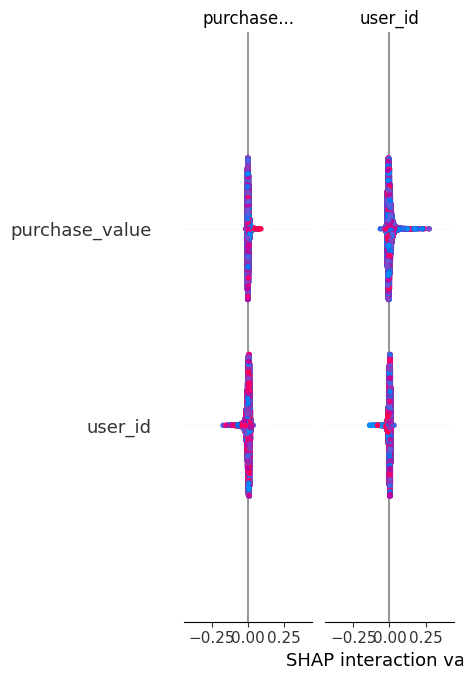

In [53]:
# Create a summary plot
shap.summary_plot(shap_value, x_test_fraund)
